# Task 2-2:  Predict Wine Quality For White Wine 

### Task 2-2 Comprises of:
#### Experiment 1 : Basic Neural Network
#### Experiment 2 : Deep Neural Network

### Wine Quality And WIne Type Classification

The wine quality data set is from UCI Machine Learning Respository. 

White Wine
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

Red Wine
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [42]:
whiteWine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
redWine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')

### Exploratory Data Analysis

In [43]:
print('whiteWine :\n')
print( whiteWine.info())
print('redWine :\n')
print(redWine.info())

whiteWine :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
redWine :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 

From observation, there are less redWine samples compared to whiteWine samples.  

In [44]:
display(redWine.head(), whiteWine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
#a function to simplify analysis of data

def dataDescribe(df):
    dfShape=df.shape
    dfInfo=df.info()
    dfTypes=df.dtypes #type of data
    dfCounts=df.apply(lambda x:x.count()) #number of sample instances
    dfNulls=df.apply(lambda x:x.isnull().sum())
    dfDistincts=df.apply(lambda x:x.unique().shape[0]) #number of distinct value for each column
    dfMax=df.apply(lambda x:x.max())
    dfMin=df.apply(lambda x:x.min())
    dfSkew=df.skew()
    dfKurtosis=df.kurt()
    
    cols=['types','count','null_entry', 'distict_value','max_value', 'min_value', 'skew','kurtosis']
    
    dfDescribe=pd.concat([dfTypes,dfCounts,dfNulls,dfDistincts,dfMax,dfMin,dfSkew,dfKurtosis],axis=1)
    
    dfDescribe.columns=cols
    
    print('Shape :', dfShape)
    print('Info :',dfInfo)
    return dfDescribe

#redWine.apply(lambda x:x.unique().shape[0])
#redWine.apply(lambda x:x.count())
#redWine.apply(lambda x:x.max())
#redWine.apply(lambda x:x.min())
#redWine.apply(lambda x:x.isnull().sum())

In [46]:
redWineDetails=dataDescribe(redWine)
display(redWineDetails)
whiteWineDetails=dataDescribe(whiteWine)
display(whiteWineDetails)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Shape : (1599, 12)
Info : None


,types,count,null_entry,distict_value,max_value,min_value,skew,kurtosis
fixed acidity,float64,1599,0,96,15.90000,4.60000,0.982751,1.132143
volatile acidity,float64,1599,0,143,1.58000,0.12000,0.671593,1.225542
citric acid,float64,1599,0,80,1.00000,0.00000,0.318337,-0.788998
residual sugar,float64,1599,0,91,15.50000,0.90000,4.540655,28.617595
chlorides,float64,1599,0,153,0.61100,0.01200,5.680347,41.715787
free sulfur dioxide,float64,1599,0,60,72.00000,1.00000,1.250567,2.023562
total sulfur dioxide,float64,1599,0,144,289.00000,6.00000,1.515531,3.809824
density,float64,1599,0,436,1.00369,0.99007,0.071288,0.934079
pH,float64,1599,0,89,4.01000,2.74000,0.193683,0.806943
sulphates,float64,1599,0,96,2.00000,0.33000,2.428672,11.720251


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Shape : (4898, 12)
Info : None


,types,count,null_entry,distict_value,max_value,min_value,skew,kurtosis
fixed acidity,float64,4898,0,68,14.20000,3.80000,0.647751,2.172178
volatile acidity,float64,4898,0,125,1.10000,0.08000,1.576980,5.091626
citric acid,float64,4898,0,87,1.66000,0.00000,1.281920,6.174901
residual sugar,float64,4898,0,310,65.80000,0.60000,1.077094,3.469820
chlorides,float64,4898,0,160,0.34600,0.00900,5.023331,37.564600
free sulfur dioxide,float64,4898,0,132,289.00000,2.00000,1.406745,11.466342
total sulfur dioxide,float64,4898,0,251,440.00000,9.00000,0.390710,0.571853
density,float64,4898,0,890,1.03898,0.98711,0.977773,9.793807
pH,float64,4898,0,103,3.82000,2.72000,0.457783,0.530775
sulphates,float64,4898,0,79,1.08000,0.22000,0.977194,1.590930


#### Both red wine and white wine dataset has no missing information. 

(acceptable range for being normally distributed for kurtosis is (-2,2), and for skewness is (-1,1))

* The following attributes of the White Wine are highly positve skewed:
  * volatile acidity, citric acid, chlorides, free sulphur dioxide, quality
* The following attributes of Red Wine are highly positve skewed:
  * residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, sulphates

The following attributes of White Wine have high kurtosis:
  * fixed acidity, volatile acidity, citric acid, residual sugar, cholrides, free sulphur dioxide, density
 
The following attributes of Red Wine havd high kurtosis:
  * residual sugar, chlorides, total sulphur dioxide, sulphates

### Visualizing The Data

In [47]:
def plotChart(redWine,whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title):
        fig, ax = plt.subplots(1, 2)

        ax[0].hist(redWine[chemical], 10, facecolor='red')


        ax[1].hist(whiteWine[chemical],10, facecolor='white', ec="black", lw=1)


        #ax[0].set_ylim([0, max(redWine[chemical].value_counts().max(),whiteWine[chemical].value_counts().max())])
        fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.05, wspace=1)
        ax[0].set_xlabel(xLabelRed)
        ax[0].set_ylabel(yLabel)
        ax[1].set_xlabel(xLabelWhite)
        ax[1].set_ylabel(yLabel)
        fig.suptitle(title)

        plt.show()


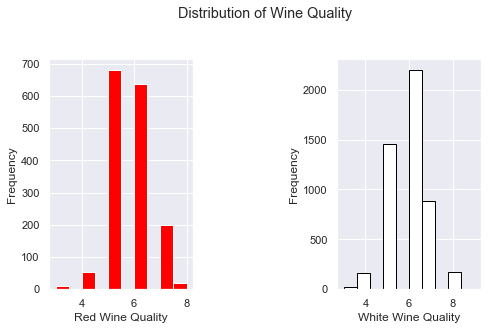

In [48]:
chemical='quality'
xLabelRed="Red Wine Quality"
xLabelWhite="White Wine Quality"
yLabel="Frequency"
title="Distribution of Wine Quality"

plotChart(redWine, whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title )



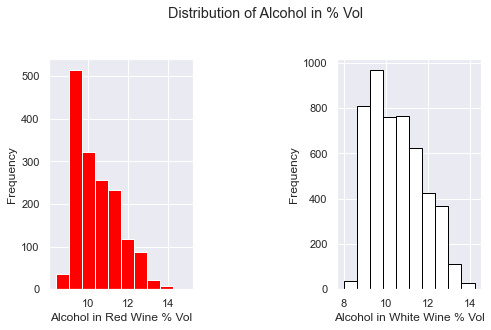

In [49]:
#Understanding Alcohol 

chemical='alcohol'
xLabelRed="Alcohol in Red Wine % Vol"
xLabelWhite="Alcohol in White Wine % Vol"
yLabel="Frequency"
title="Distribution of Alcohol in % Vol"

plotChart(redWine, whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title )


As can be observed in the chart above, alcohol levels for both red and white wine are mostly around 9-10%. Very few wines are above 14% in alcohol. 

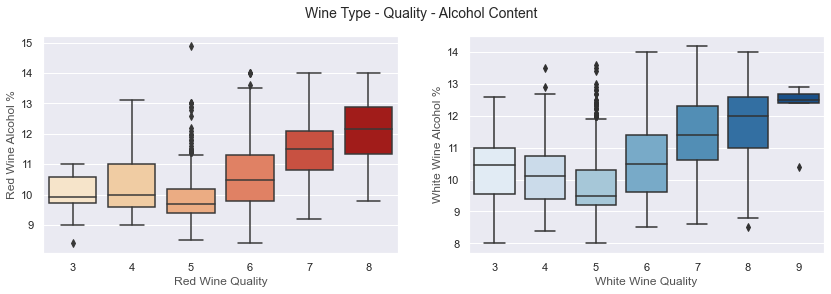

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x='quality', y='alcohol',ax=ax1, data=redWine, palette='OrRd')


ax1.set_xlabel("Red Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Red Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x='quality', y='alcohol', data=whiteWine, ax=ax2, palette='Blues')

ax2.set_xlabel("White Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("White Wine Alcohol %",size = 12,alpha=0.8)
plt.show()


From the chart above, it can be obseved that mean alcohol levels are higher for better wine quality rating for both red or white wine. However for average wine quality, outliers in alcohol level can be observed. Perhaps it is harder to discern average wine based on alcohol level.  

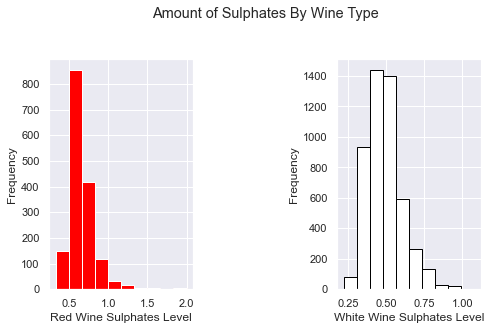

In [51]:
chemical='sulphates'
xLabelRed="Red Wine Sulphates Level"
xLabelWhite="White Wine Sulphates Level"
yLabel="Frequency"
title="Amount of Sulphates By Wine Type"

plotChart(redWine, whiteWine,chemical, xLabelRed,xLabelWhite,yLabel,title )




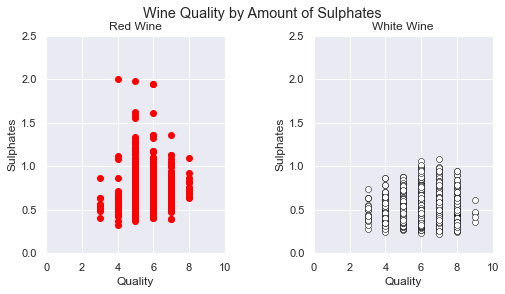

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(redWine['quality'], redWine["sulphates"], color="red")
ax[1].scatter(whiteWine['quality'], whiteWine['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

Suplhates are related to the fermentation process of wine and affects the aroma and flavor. However, sulphates has been reported to cause headaches in females more often than males. 

As can be observed from the charts, red wine generally has higher levels of sulphates compared to white wine. 

From the scatter plot, higher quality red and white wines have lower levels of sulphates. 

In [53]:
subset_attributes = redWine.columns
print(subset_attributes)
rs = round(redWine.loc[:, subset_attributes].describe(),2)
#print(rs)
ws = round(whiteWine.loc[:, subset_attributes].describe(),2)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.85   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

#### Comments From Descriptive Statistics Above:
* Red wine has highter mean values of fixed acidity, volatile acidity and sulphates compared to white wine.
* White wine has higher mean values of residual sugar, free sulphur dioxide, total sulphur dioxide than red wine.
* Alcohol content does not give much variation to distiguish between White and Red Wine. 


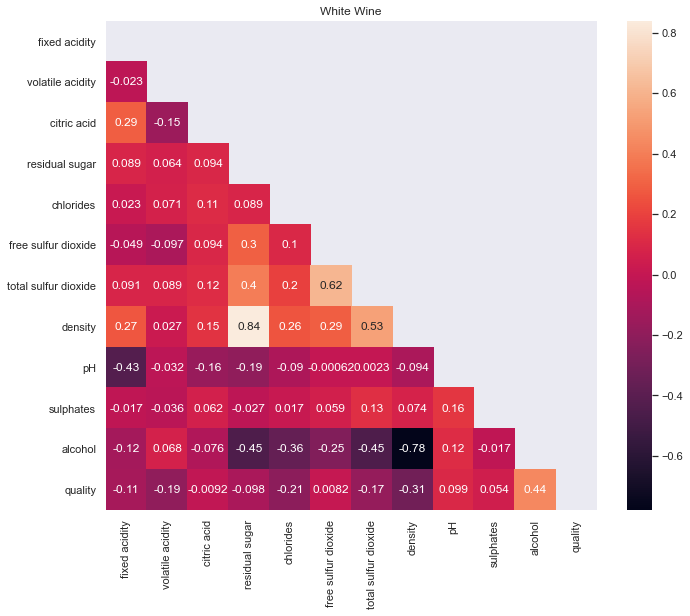

In [54]:
fig,ax=plt.subplots(figsize=(11,9))

mask = np.triu(np.ones_like(whiteWine.corr(), dtype=bool))

sns.heatmap(whiteWine.corr(), 
            mask=mask,
            annot=True
           )
            #xticklabels=redWine.corr().columns.values, 
            #yticklabels=redWine.corr().columns.values, ax=ax[0])
ax.set_title('White Wine')

plt.show()

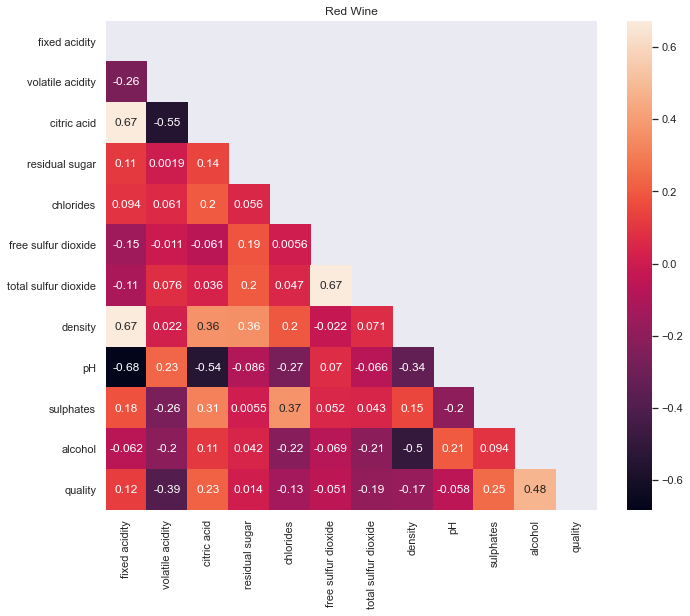

In [55]:
fig,ax=plt.subplots(figsize=(11,9))

mask = np.triu(np.ones_like(redWine.corr(), dtype=bool))

sns.heatmap(redWine.corr(), 
            mask=mask,
            annot=True
           )
            #xticklabels=redWine.corr().columns.values, 
            #yticklabels=redWine.corr().columns.values, ax=ax[0])
ax.set_title('Red Wine')

plt.show()

#### Comments on Correlations 
* For White Wine, density has relatively high positive correlation with residual sugar, and high negative correlation with alcohol. 
* For Red Wine, alcohol has high positive correlation with quality, and strong negative correlation between density and alcohol level. 
* Generally, free sulphur dioxide and total sulphur dioxide tend to positively correlate. Volatile acidity and citric acid tend to negatively correlate. 

From wine literature, density is generally used as measure of conversion of sugar to alcohol.  So in the case of white wine, the high positive correlation between density and residual sugar and negative correlation with alcohol makes sense as it reflects more conversion of sugar to alcohol. 


### Preprocess Data

This project will be predicting: 
* whether wine sample is red or white wine
* Quality of wine sample

The plan also include trying functional api with two inputs and two outputs for predicting both wine quality and wine type. 

In [56]:
whiteWine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [57]:
#create class labels for the wine quality score. 
#this is because wine quality score for red wine does not have score 0,1,2 and 10.
#this missing target label supply no information on what constitutes quality score of 1,2 and 10.
#hence any multi-class or regression prediction using the original wine quality score will not be able to predict
#wine quality score0,1,2 and 10.
#A better approach is to group quality score into bands as low, average, good. 
#3,4- low. 5,6 - average, 7,8,9 good

#Set 'low':0, 'average':1,'good':2

whiteWine['quality_class']=whiteWine.quality.apply(lambda x: 0 if x<5 else 2 if x>6 else 1) 
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [58]:
display(whiteWine.quality_class.value_counts())


1    3655
2    1060
0     183
Name: quality_class, dtype: int64

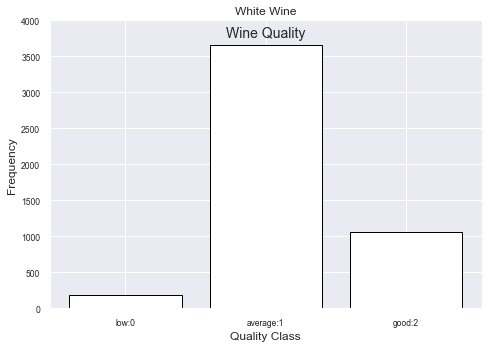

In [59]:
fig=plt.figure(figsize=(6,4))
ax= fig.add_axes([0,0,1,1])

title = fig.suptitle("Wine Quality", fontsize=14)
ax.set_title("White Wine")
ax.set_xlabel("Quality Class")
ax.set_ylabel("Frequency") 

ww_q = whiteWine.quality_class.value_counts().sort_index()
ww_q = (list(ww_q.index), list(ww_q.values))
ax.set_ylim([0, 4000])
ax.tick_params(axis='both', which='major', labelsize=8.5)
ax.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', 
               edgecolor='black', linewidth=1, tick_label =['low:0','average:1','good:2'])

plt.show()

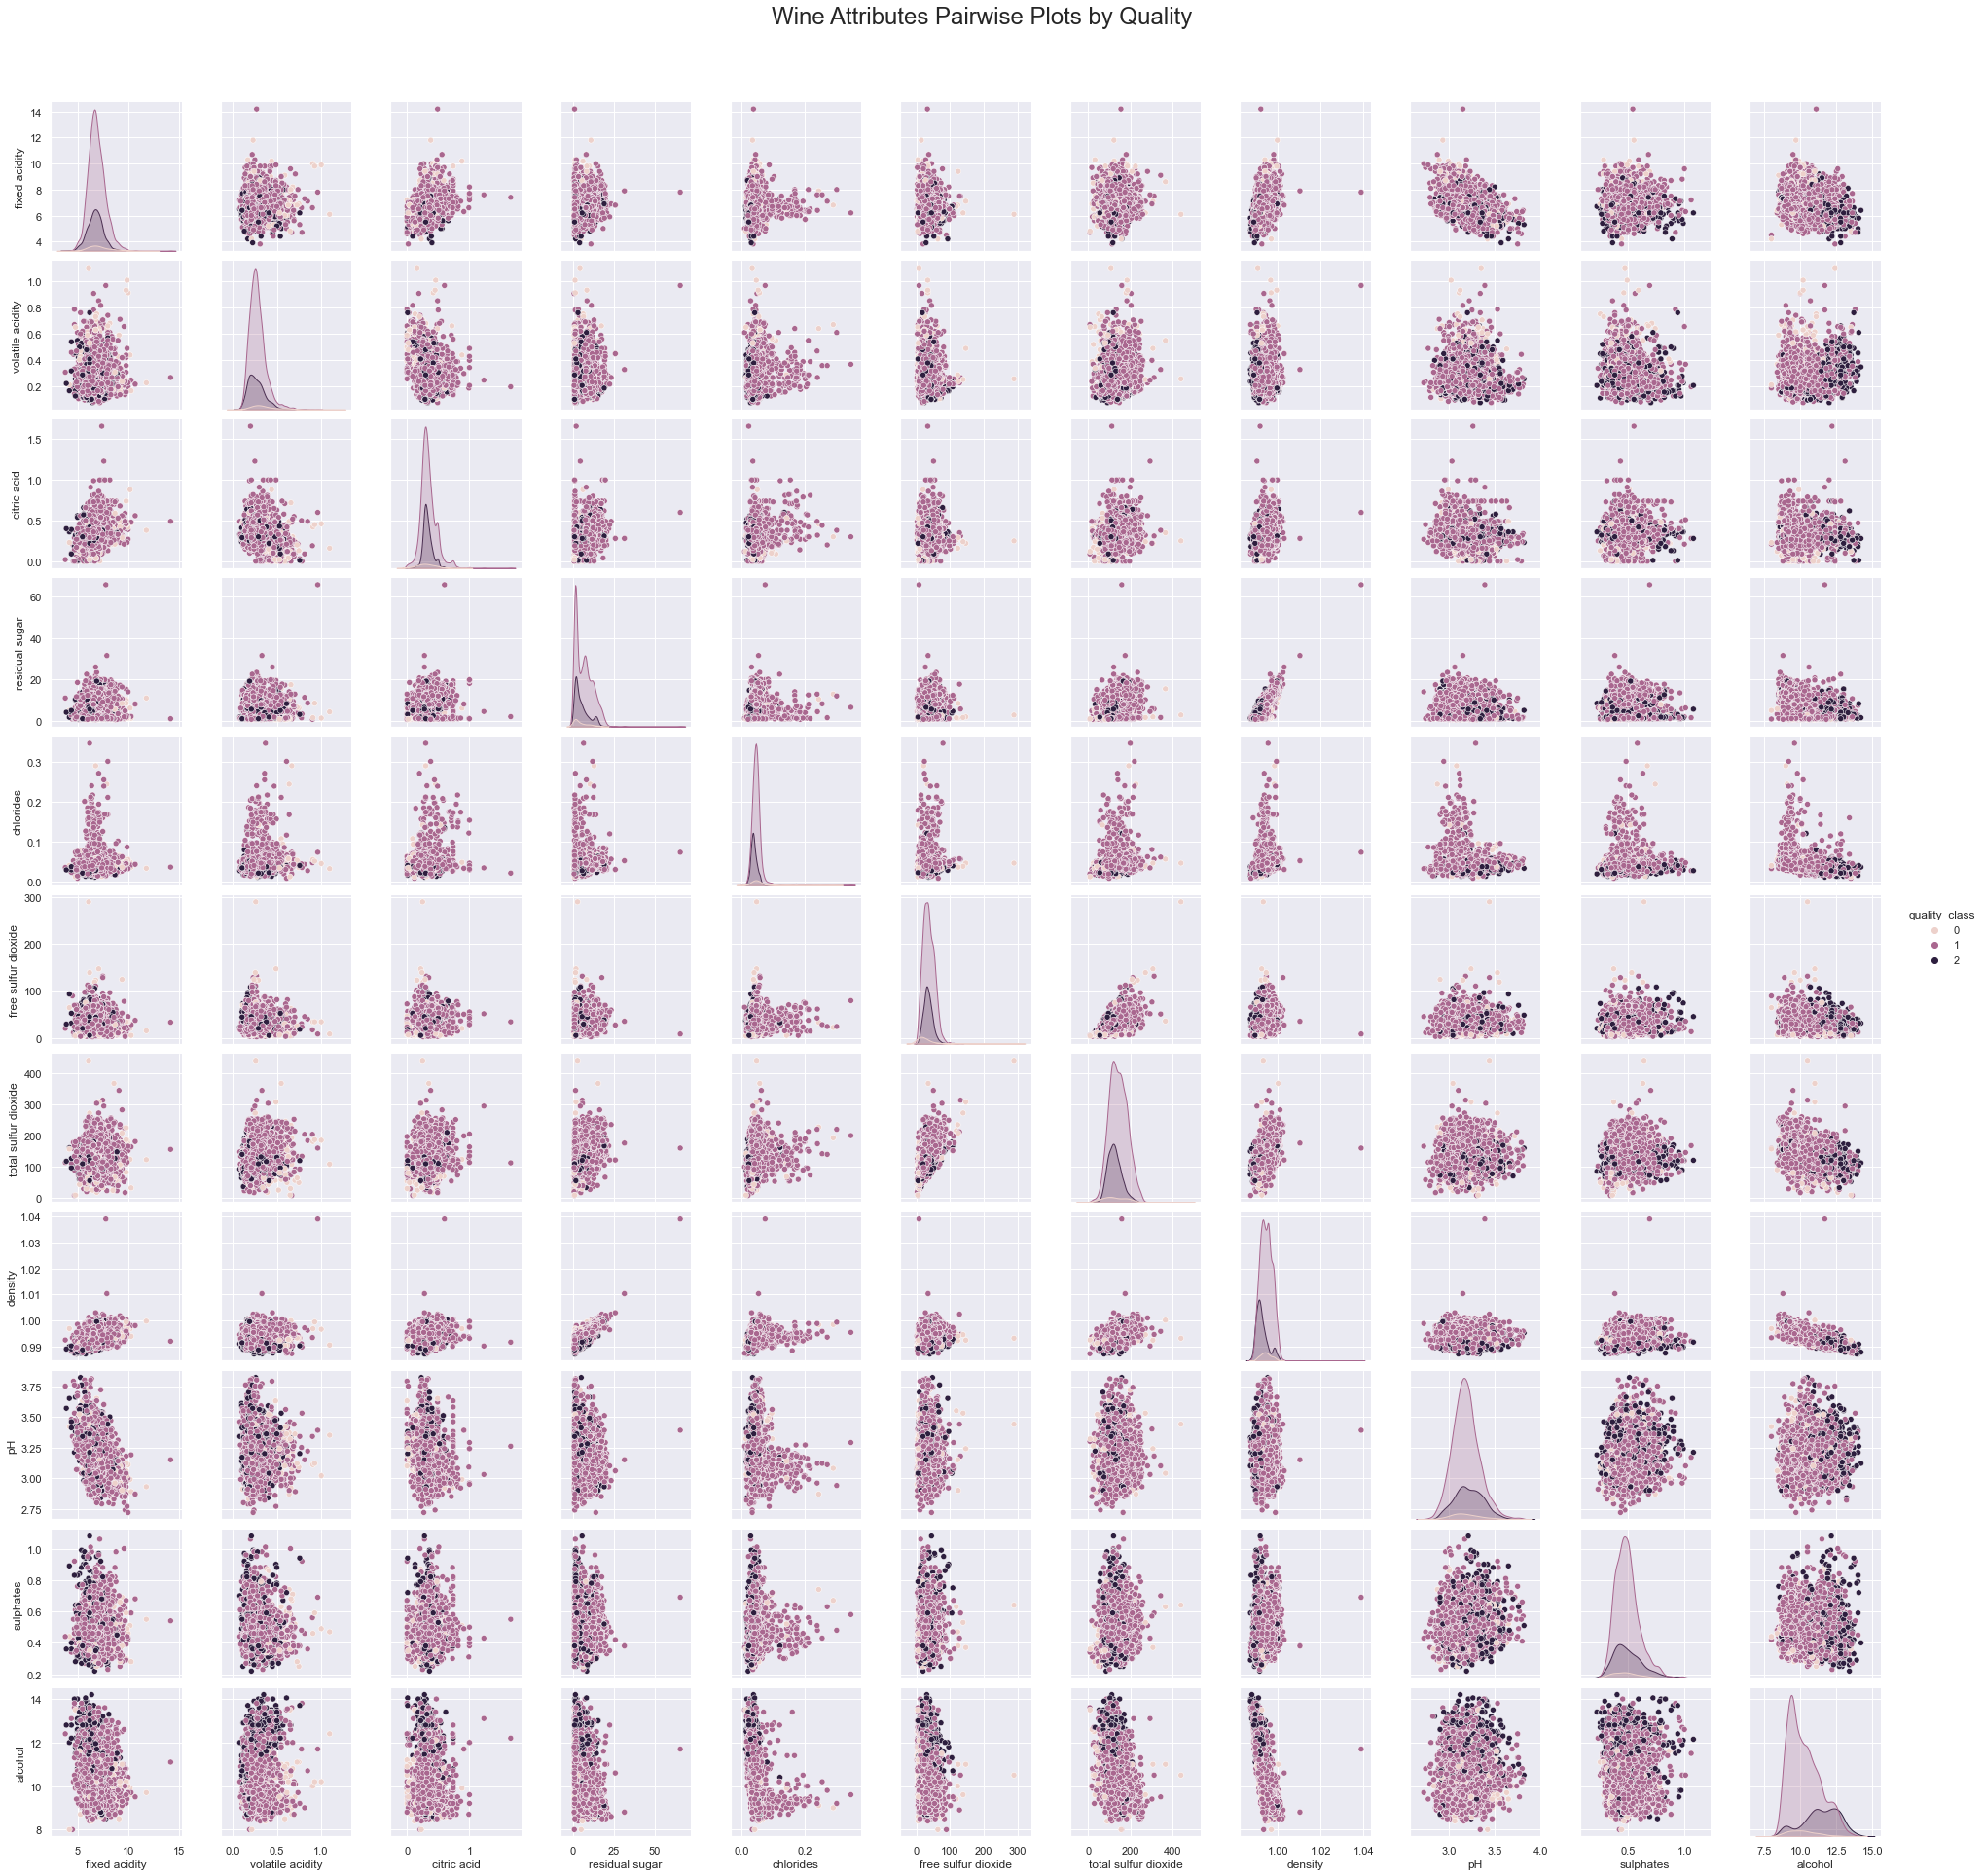

In [60]:
sns.set(font_scale=1.0)
cols = whiteWine.columns
cols = cols.drop('quality')
g = sns.pairplot(data = whiteWine.loc[:, cols], hue='quality_class')
fig = g.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots by Quality', fontsize=24)

plt.show()

### Train Test Split

In [61]:
X=whiteWine.drop(['quality','quality_class'],axis=1)
display(X.shape)
y=whiteWine['quality_class']
display(y.head())

(4898, 11)

0    1
1    1
2    1
3    1
4    1
Name: quality_class, dtype: int64

y=pd.get_dummies(y)
y

In [62]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
y_train[-5:]

4426    1
466     1
3092    1
3772    1
860     2
Name: quality_class, dtype: int64

In [65]:
y_test[-5:]

3207    1
1539    1
964     1
168     1
3661    1
Name: quality_class, dtype: int64

#### Standarization of th data
It has been observed during data exploration that range of max and min values for each attributes are sometimes several magnitudes difference. 

Therefore, standarization is required for the data. StanardScaler is selected as it deals better with outliers. 

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


In [67]:
display(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(3918, 11)

(980, 11)

(3918,)

(980,)

### Create DNN Multi-Class Classifier For Wine Quality With Keras

### Wine Quality Prediction

The quality of a wine is an ordinal scale with 0 being the lowest and 10 being the best wine quality. 

The task to predict wine quality can be viewed as a ordinal regression task if we assume wine quality to be a continous variable. But this can also be viewed as a classification problem given that the number of labels for wine quality is only 10. 

This project will approach the prediction of wine quality as an ordinal regression task since the classification technique has already been used for classifying wine type. 


#### Preprocess the data


#### Set Up Neural Network Model For Multi-Class Task - Predicting Wine Quality



### Imbalance Data - Red wine and White Wine.
---deal with this. 
### SMOTE For Balancing Data
There is a problem with imbalanced classification because the minority class, in this case Red Wine,is outnumbered by almost three times (4898 white wine samples vs 1599 red wine samples). 

THe approach to solve this problem is to oversample the examples in the minority class. This can be achieved by synthesizing new examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional indormation to the model. 

The technique used here is called Synthetic Minority Oversampling Technique (SMOTE). 


<AxesSubplot:xlabel='quality_class', ylabel='count'>

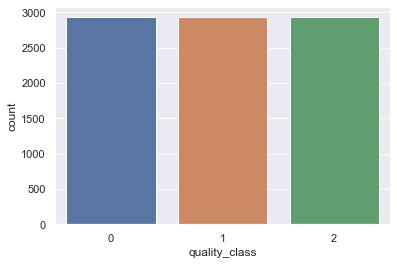

In [68]:
from imblearn.over_sampling import SMOTE 
#import imbalanced-learn python library.
oversample=SMOTE(random_state=42)
X_smote_train,y_smote_train=oversample.fit_resample(X_train,y_train)

sns.countplot(x=y_smote_train)

In [69]:
type(y_smote_train)

pandas.core.series.Series

In [70]:
X_smote_train[0:5,:]

array([[ 5.15119310e-01, -1.07623315e+00,  2.27730764e-01,
         3.40419470e-01, -8.13688488e-01,  5.34064605e-01,
        -6.41932319e-01, -4.47040725e-01, -3.28261014e-01,
        -7.02444738e-01,  1.54037099e+00],
       [-6.69188091e-01, -2.88776731e-01,  8.95831948e-01,
         1.00207124e+00, -2.17211567e-01,  7.73947112e-01,
         1.35510550e+00,  9.03369755e-01, -6.18856911e-02,
         2.66074147e-01, -8.21711966e-01],
       [-1.49820327e+00,  4.00247639e-01, -2.28071805e-02,
         1.84736700e-01, -4.00742927e-01, -6.05377303e-01,
        -1.02232048e+00, -4.60280044e-01,  4.04271124e-01,
         1.93263316e-03,  4.81506217e-01],
       [ 4.13963498e-02, -8.79369048e-01,  1.44218115e-01,
        -9.24503038e-01, -4.46625767e-01, -1.25612289e-01,
        -8.79674917e-01, -3.04718052e-01,  1.37895801e-01,
         4.42168490e-01,  2.37152807e-01],
       [ 9.88842271e-01,  2.03383533e-01, -6.07395717e-01,
         2.43240669e+00,  3.33382515e-01,  5.42995912e-02,
  

### Experiment 1- Basic Neural Network

* Fully Connected
* Feedforward
* 1 hidden layer, no regularization, learning rate-0.01
* as rule of thumb, number of neurons in hidden layer should be less than twice of input. 



In [71]:
%%time

from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import metrics

epoch_set=200
seed = 42
np.random.seed(seed)
history=[]
m=None
cvscores=[]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X_smote_train, y_smote_train):
    print(train.shape, test.shape)
    #print(X_smote_train.iloc[train,:])
    model = Sequential()
    model.add(Dense(20, input_dim=11, activation='relu'))
    
    model.add(Dense(3,activation='softmax')) #there are 3 labels of wine quality class.
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum-0.0)
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    m=model
    
    h=(model.fit(X_smote_train[train,:], y_smote_train[train], batch_size=32,epochs=epoch_set,verbose=1,
                validation_data=(X_smote_train[test], y_smote_train[test])
                
                
                )) 
    
    #shuffle=True, validation_data=(X_test,y_test_enc)
    history.append(h)
    
    #scores = model.evaluate(X_smote_train[test], y_train_enc[test], verbose=1)
    #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    #cvscores.append(scores[1] * 100)
#print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

(7036,) (1760,)
Epoch 1/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7282 - sparse_categorical_accuracy: 0.6707 - val_loss: 0.6867 - val_sparse_categorical_accuracy: 0.7006
Epoch 2/200
220/220 [==============================] - 0s 692us/step - loss: 0.6311 - sparse_categorical_accuracy: 0.7199 - val_loss: 0.6349 - val_sparse_categorical_accuracy: 0.7256
Epoch 3/200
220/220 [==============================] - 0s 719us/step - loss: 0.6076 - sparse_categorical_accuracy: 0.7324 - val_loss: 0.6307 - val_sparse_categorical_accuracy: 0.7188
Epoch 4/200
220/220 [==============================] - 0s 698us/step - loss: 0.5877 - sparse_categorical_accuracy: 0.7361 - val_loss: 0.6457 - val_sparse_categorical_accuracy: 0.7318
Epoch 5/200
220/220 [==============================] - 0s 701us/step - loss: 0.5777 - sparse_categorical_accuracy: 0.7504 - val_loss: 0.6110 - val_sparse_categorical_accuracy: 0.7420
Epoch 6/200
220/220 [==============================] - 0s 699us/step - 

220/220 [==============================] - 0s 710us/step - loss: 0.4897 - sparse_categorical_accuracy: 0.7986 - val_loss: 0.5169 - val_sparse_categorical_accuracy: 0.7847
Epoch 46/200
220/220 [==============================] - 0s 711us/step - loss: 0.4876 - sparse_categorical_accuracy: 0.7962 - val_loss: 0.5604 - val_sparse_categorical_accuracy: 0.7830
Epoch 47/200
220/220 [==============================] - 0s 711us/step - loss: 0.4862 - sparse_categorical_accuracy: 0.7983 - val_loss: 0.5345 - val_sparse_categorical_accuracy: 0.7892
Epoch 48/200
220/220 [==============================] - 0s 689us/step - loss: 0.4847 - sparse_categorical_accuracy: 0.7948 - val_loss: 0.5174 - val_sparse_categorical_accuracy: 0.7864
Epoch 49/200
220/220 [==============================] - 0s 694us/step - loss: 0.4810 - sparse_categorical_accuracy: 0.7997 - val_loss: 0.5273 - val_sparse_categorical_accuracy: 0.7807
Epoch 50/200
220/220 [==============================] - 0s 704us/step - loss: 0.4897 - sparse

220/220 [==============================] - 0s 738us/step - loss: 0.4737 - sparse_categorical_accuracy: 0.8066 - val_loss: 0.5028 - val_sparse_categorical_accuracy: 0.7977
Epoch 90/200
220/220 [==============================] - 0s 758us/step - loss: 0.4694 - sparse_categorical_accuracy: 0.8073 - val_loss: 0.5368 - val_sparse_categorical_accuracy: 0.7710
Epoch 91/200
220/220 [==============================] - 0s 723us/step - loss: 0.4710 - sparse_categorical_accuracy: 0.8103 - val_loss: 0.5373 - val_sparse_categorical_accuracy: 0.7869
Epoch 92/200
220/220 [==============================] - 0s 729us/step - loss: 0.4703 - sparse_categorical_accuracy: 0.8080 - val_loss: 0.5151 - val_sparse_categorical_accuracy: 0.8011
Epoch 93/200
220/220 [==============================] - 0s 726us/step - loss: 0.4700 - sparse_categorical_accuracy: 0.8051 - val_loss: 0.5227 - val_sparse_categorical_accuracy: 0.7903
Epoch 94/200
220/220 [==============================] - 0s 715us/step - loss: 0.4703 - sparse

220/220 [==============================] - 0s 741us/step - loss: 0.4674 - sparse_categorical_accuracy: 0.8118 - val_loss: 0.5424 - val_sparse_categorical_accuracy: 0.7937
Epoch 134/200
220/220 [==============================] - 0s 715us/step - loss: 0.4623 - sparse_categorical_accuracy: 0.8100 - val_loss: 0.5107 - val_sparse_categorical_accuracy: 0.7932
Epoch 135/200
220/220 [==============================] - 0s 696us/step - loss: 0.4686 - sparse_categorical_accuracy: 0.8101 - val_loss: 0.5142 - val_sparse_categorical_accuracy: 0.8006
Epoch 136/200
220/220 [==============================] - 0s 729us/step - loss: 0.4643 - sparse_categorical_accuracy: 0.8060 - val_loss: 0.5214 - val_sparse_categorical_accuracy: 0.7983
Epoch 137/200
220/220 [==============================] - 0s 690us/step - loss: 0.4582 - sparse_categorical_accuracy: 0.8158 - val_loss: 0.5349 - val_sparse_categorical_accuracy: 0.7830
Epoch 138/200
220/220 [==============================] - 0s 734us/step - loss: 0.4568 - s

220/220 [==============================] - 0s 683us/step - loss: 0.4583 - sparse_categorical_accuracy: 0.8113 - val_loss: 0.5619 - val_sparse_categorical_accuracy: 0.7909
Epoch 178/200
220/220 [==============================] - 0s 710us/step - loss: 0.4598 - sparse_categorical_accuracy: 0.8147 - val_loss: 0.5257 - val_sparse_categorical_accuracy: 0.7926
Epoch 179/200
220/220 [==============================] - 0s 698us/step - loss: 0.4611 - sparse_categorical_accuracy: 0.8130 - val_loss: 0.5283 - val_sparse_categorical_accuracy: 0.7994
Epoch 180/200
220/220 [==============================] - 0s 691us/step - loss: 0.4626 - sparse_categorical_accuracy: 0.8115 - val_loss: 0.5454 - val_sparse_categorical_accuracy: 0.7869
Epoch 181/200
220/220 [==============================] - 0s 655us/step - loss: 0.4589 - sparse_categorical_accuracy: 0.8148 - val_loss: 0.5257 - val_sparse_categorical_accuracy: 0.7932
Epoch 182/200
220/220 [==============================] - 0s 652us/step - loss: 0.4533 - s

220/220 [==============================] - 0s 658us/step - loss: 0.5288 - sparse_categorical_accuracy: 0.7779 - val_loss: 0.4989 - val_sparse_categorical_accuracy: 0.7806
Epoch 22/200
220/220 [==============================] - 0s 662us/step - loss: 0.5229 - sparse_categorical_accuracy: 0.7792 - val_loss: 0.5120 - val_sparse_categorical_accuracy: 0.7760
Epoch 23/200
220/220 [==============================] - 0s 662us/step - loss: 0.5215 - sparse_categorical_accuracy: 0.7837 - val_loss: 0.4915 - val_sparse_categorical_accuracy: 0.7931
Epoch 24/200
220/220 [==============================] - 0s 681us/step - loss: 0.5100 - sparse_categorical_accuracy: 0.7871 - val_loss: 0.5075 - val_sparse_categorical_accuracy: 0.7817
Epoch 25/200
220/220 [==============================] - 0s 701us/step - loss: 0.5163 - sparse_categorical_accuracy: 0.7813 - val_loss: 0.4816 - val_sparse_categorical_accuracy: 0.7959
Epoch 26/200
220/220 [==============================] - 0s 700us/step - loss: 0.5125 - sparse

220/220 [==============================] - 0s 994us/step - loss: 0.4819 - sparse_categorical_accuracy: 0.7984 - val_loss: 0.4746 - val_sparse_categorical_accuracy: 0.8050
Epoch 66/200
220/220 [==============================] - 0s 967us/step - loss: 0.4788 - sparse_categorical_accuracy: 0.7982 - val_loss: 0.5079 - val_sparse_categorical_accuracy: 0.7891
Epoch 67/200
220/220 [==============================] - 0s 972us/step - loss: 0.4907 - sparse_categorical_accuracy: 0.7945 - val_loss: 0.4826 - val_sparse_categorical_accuracy: 0.8005
Epoch 68/200
220/220 [==============================] - 0s 974us/step - loss: 0.4841 - sparse_categorical_accuracy: 0.8016 - val_loss: 0.5145 - val_sparse_categorical_accuracy: 0.7908
Epoch 69/200
220/220 [==============================] - 0s 951us/step - loss: 0.4853 - sparse_categorical_accuracy: 0.7949 - val_loss: 0.5001 - val_sparse_categorical_accuracy: 0.7868
Epoch 70/200
220/220 [==============================] - 0s 929us/step - loss: 0.4872 - sparse

Epoch 110/200
220/220 [==============================] - 0s 1ms/step - loss: 0.4762 - sparse_categorical_accuracy: 0.8005 - val_loss: 0.4735 - val_sparse_categorical_accuracy: 0.8033
Epoch 111/200
220/220 [==============================] - 0s 1ms/step - loss: 0.4746 - sparse_categorical_accuracy: 0.7991 - val_loss: 0.4908 - val_sparse_categorical_accuracy: 0.7891
Epoch 112/200
220/220 [==============================] - 0s 1ms/step - loss: 0.4710 - sparse_categorical_accuracy: 0.8005 - val_loss: 0.4633 - val_sparse_categorical_accuracy: 0.8061
Epoch 113/200
220/220 [==============================] - 0s 1ms/step - loss: 0.4778 - sparse_categorical_accuracy: 0.7982 - val_loss: 0.4954 - val_sparse_categorical_accuracy: 0.7936
Epoch 114/200
220/220 [==============================] - 0s 1ms/step - loss: 0.4782 - sparse_categorical_accuracy: 0.8020 - val_loss: 0.4833 - val_sparse_categorical_accuracy: 0.8141
Epoch 115/200
220/220 [==============================] - 0s 1ms/step - loss: 0.4746 -

Epoch 155/200
220/220 [==============================] - 0s 959us/step - loss: 0.4723 - sparse_categorical_accuracy: 0.8018 - val_loss: 0.4642 - val_sparse_categorical_accuracy: 0.8056
Epoch 156/200
220/220 [==============================] - 0s 974us/step - loss: 0.4737 - sparse_categorical_accuracy: 0.8032 - val_loss: 0.4665 - val_sparse_categorical_accuracy: 0.8147
Epoch 157/200
220/220 [==============================] - 0s 976us/step - loss: 0.4698 - sparse_categorical_accuracy: 0.8039 - val_loss: 0.4627 - val_sparse_categorical_accuracy: 0.8033
Epoch 158/200
220/220 [==============================] - 0s 954us/step - loss: 0.4686 - sparse_categorical_accuracy: 0.8045 - val_loss: 0.4748 - val_sparse_categorical_accuracy: 0.8067
Epoch 159/200
220/220 [==============================] - 0s 1ms/step - loss: 0.4712 - sparse_categorical_accuracy: 0.8070 - val_loss: 0.4734 - val_sparse_categorical_accuracy: 0.8027
Epoch 160/200
220/220 [==============================] - 0s 1ms/step - loss: 

220/220 [==============================] - 0s 943us/step - loss: 0.4659 - sparse_categorical_accuracy: 0.8072 - val_loss: 0.4758 - val_sparse_categorical_accuracy: 0.8124
Epoch 200/200
220/220 [==============================] - 0s 951us/step - loss: 0.4656 - sparse_categorical_accuracy: 0.8101 - val_loss: 0.4600 - val_sparse_categorical_accuracy: 0.8169
(7037,) (1759,)
Epoch 1/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7469 - sparse_categorical_accuracy: 0.6568 - val_loss: 0.6688 - val_sparse_categorical_accuracy: 0.7078
Epoch 2/200
220/220 [==============================] - 0s 921us/step - loss: 0.6448 - sparse_categorical_accuracy: 0.7105 - val_loss: 0.6433 - val_sparse_categorical_accuracy: 0.7129
Epoch 3/200
220/220 [==============================] - 0s 923us/step - loss: 0.6106 - sparse_categorical_accuracy: 0.7287 - val_loss: 0.6137 - val_sparse_categorical_accuracy: 0.7243
Epoch 4/200
220/220 [==============================] - 0s 953us/step - loss: 0.59

220/220 [==============================] - 0s 916us/step - loss: 0.4927 - sparse_categorical_accuracy: 0.7959 - val_loss: 0.5385 - val_sparse_categorical_accuracy: 0.7823
Epoch 44/200
220/220 [==============================] - 0s 830us/step - loss: 0.4896 - sparse_categorical_accuracy: 0.7988 - val_loss: 0.5388 - val_sparse_categorical_accuracy: 0.7811
Epoch 45/200
220/220 [==============================] - 0s 840us/step - loss: 0.4895 - sparse_categorical_accuracy: 0.7993 - val_loss: 0.5282 - val_sparse_categorical_accuracy: 0.7914
Epoch 46/200
220/220 [==============================] - 0s 804us/step - loss: 0.4888 - sparse_categorical_accuracy: 0.7991 - val_loss: 0.5131 - val_sparse_categorical_accuracy: 0.7919
Epoch 47/200
220/220 [==============================] - 0s 810us/step - loss: 0.4857 - sparse_categorical_accuracy: 0.8015 - val_loss: 0.5148 - val_sparse_categorical_accuracy: 0.8061
Epoch 48/200
220/220 [==============================] - 0s 815us/step - loss: 0.4943 - sparse

220/220 [==============================] - 0s 787us/step - loss: 0.4738 - sparse_categorical_accuracy: 0.8059 - val_loss: 0.5110 - val_sparse_categorical_accuracy: 0.8005
Epoch 88/200
220/220 [==============================] - 0s 759us/step - loss: 0.4714 - sparse_categorical_accuracy: 0.8114 - val_loss: 0.5094 - val_sparse_categorical_accuracy: 0.7959
Epoch 89/200
220/220 [==============================] - 0s 754us/step - loss: 0.4714 - sparse_categorical_accuracy: 0.8100 - val_loss: 0.5094 - val_sparse_categorical_accuracy: 0.8039
Epoch 90/200
220/220 [==============================] - 0s 774us/step - loss: 0.4748 - sparse_categorical_accuracy: 0.8084 - val_loss: 0.5217 - val_sparse_categorical_accuracy: 0.8022
Epoch 91/200
220/220 [==============================] - 0s 781us/step - loss: 0.4771 - sparse_categorical_accuracy: 0.8055 - val_loss: 0.5063 - val_sparse_categorical_accuracy: 0.8016
Epoch 92/200
220/220 [==============================] - 0s 767us/step - loss: 0.4788 - sparse

220/220 [==============================] - 0s 722us/step - loss: 0.4640 - sparse_categorical_accuracy: 0.8128 - val_loss: 0.5590 - val_sparse_categorical_accuracy: 0.7595
Epoch 132/200
220/220 [==============================] - 0s 740us/step - loss: 0.4689 - sparse_categorical_accuracy: 0.8062 - val_loss: 0.4920 - val_sparse_categorical_accuracy: 0.8096
Epoch 133/200
220/220 [==============================] - 0s 710us/step - loss: 0.4682 - sparse_categorical_accuracy: 0.8150 - val_loss: 0.4946 - val_sparse_categorical_accuracy: 0.8050
Epoch 134/200
220/220 [==============================] - 0s 717us/step - loss: 0.4675 - sparse_categorical_accuracy: 0.8080 - val_loss: 0.4960 - val_sparse_categorical_accuracy: 0.8067
Epoch 135/200
220/220 [==============================] - 0s 718us/step - loss: 0.4666 - sparse_categorical_accuracy: 0.8117 - val_loss: 0.4952 - val_sparse_categorical_accuracy: 0.8101
Epoch 136/200
220/220 [==============================] - 0s 714us/step - loss: 0.4596 - s

220/220 [==============================] - 0s 720us/step - loss: 0.4645 - sparse_categorical_accuracy: 0.8079 - val_loss: 0.5179 - val_sparse_categorical_accuracy: 0.7953
Epoch 176/200
220/220 [==============================] - 0s 714us/step - loss: 0.4629 - sparse_categorical_accuracy: 0.8130 - val_loss: 0.5234 - val_sparse_categorical_accuracy: 0.8067
Epoch 177/200
220/220 [==============================] - 0s 720us/step - loss: 0.4599 - sparse_categorical_accuracy: 0.8157 - val_loss: 0.5040 - val_sparse_categorical_accuracy: 0.8010
Epoch 178/200
220/220 [==============================] - 0s 710us/step - loss: 0.4586 - sparse_categorical_accuracy: 0.8155 - val_loss: 0.5086 - val_sparse_categorical_accuracy: 0.8050
Epoch 179/200
220/220 [==============================] - 0s 712us/step - loss: 0.4572 - sparse_categorical_accuracy: 0.8157 - val_loss: 0.4985 - val_sparse_categorical_accuracy: 0.8078
Epoch 180/200
220/220 [==============================] - 0s 739us/step - loss: 0.4621 - s

220/220 [==============================] - 0s 758us/step - loss: 0.5038 - sparse_categorical_accuracy: 0.7958 - val_loss: 0.5616 - val_sparse_categorical_accuracy: 0.7777
Epoch 20/200
220/220 [==============================] - 0s 745us/step - loss: 0.5031 - sparse_categorical_accuracy: 0.7901 - val_loss: 0.5635 - val_sparse_categorical_accuracy: 0.7709
Epoch 21/200
220/220 [==============================] - 0s 753us/step - loss: 0.4999 - sparse_categorical_accuracy: 0.7907 - val_loss: 0.5647 - val_sparse_categorical_accuracy: 0.7749
Epoch 22/200
220/220 [==============================] - 0s 749us/step - loss: 0.5006 - sparse_categorical_accuracy: 0.7945 - val_loss: 0.5464 - val_sparse_categorical_accuracy: 0.7885
Epoch 23/200
220/220 [==============================] - 0s 742us/step - loss: 0.5014 - sparse_categorical_accuracy: 0.7942 - val_loss: 0.5598 - val_sparse_categorical_accuracy: 0.7646
Epoch 24/200
220/220 [==============================] - 0s 741us/step - loss: 0.4935 - sparse

220/220 [==============================] - 0s 745us/step - loss: 0.4622 - sparse_categorical_accuracy: 0.8119 - val_loss: 0.5390 - val_sparse_categorical_accuracy: 0.7874
Epoch 64/200
220/220 [==============================] - 0s 745us/step - loss: 0.4545 - sparse_categorical_accuracy: 0.8192 - val_loss: 0.5210 - val_sparse_categorical_accuracy: 0.7965
Epoch 65/200
220/220 [==============================] - 0s 742us/step - loss: 0.4634 - sparse_categorical_accuracy: 0.8123 - val_loss: 0.5195 - val_sparse_categorical_accuracy: 0.7919
Epoch 66/200
220/220 [==============================] - 0s 743us/step - loss: 0.4593 - sparse_categorical_accuracy: 0.8119 - val_loss: 0.5574 - val_sparse_categorical_accuracy: 0.7703
Epoch 67/200
220/220 [==============================] - 0s 741us/step - loss: 0.4561 - sparse_categorical_accuracy: 0.8140 - val_loss: 0.5276 - val_sparse_categorical_accuracy: 0.7999
Epoch 68/200
220/220 [==============================] - 0s 741us/step - loss: 0.4579 - sparse

220/220 [==============================] - 0s 713us/step - loss: 0.4386 - sparse_categorical_accuracy: 0.8208 - val_loss: 0.5105 - val_sparse_categorical_accuracy: 0.7942
Epoch 108/200
220/220 [==============================] - 0s 700us/step - loss: 0.4450 - sparse_categorical_accuracy: 0.8188 - val_loss: 0.5319 - val_sparse_categorical_accuracy: 0.7953
Epoch 109/200
220/220 [==============================] - 0s 698us/step - loss: 0.4468 - sparse_categorical_accuracy: 0.8182 - val_loss: 0.5143 - val_sparse_categorical_accuracy: 0.8033
Epoch 110/200
220/220 [==============================] - 0s 707us/step - loss: 0.4481 - sparse_categorical_accuracy: 0.8171 - val_loss: 0.5181 - val_sparse_categorical_accuracy: 0.8050
Epoch 111/200
220/220 [==============================] - 0s 698us/step - loss: 0.4495 - sparse_categorical_accuracy: 0.8191 - val_loss: 0.5096 - val_sparse_categorical_accuracy: 0.7999
Epoch 112/200
220/220 [==============================] - 0s 702us/step - loss: 0.4398 - s

220/220 [==============================] - 0s 711us/step - loss: 0.4343 - sparse_categorical_accuracy: 0.8204 - val_loss: 0.5076 - val_sparse_categorical_accuracy: 0.8044
Epoch 152/200
220/220 [==============================] - 0s 694us/step - loss: 0.4428 - sparse_categorical_accuracy: 0.8225 - val_loss: 0.5138 - val_sparse_categorical_accuracy: 0.8022
Epoch 153/200
220/220 [==============================] - 0s 696us/step - loss: 0.4422 - sparse_categorical_accuracy: 0.8217 - val_loss: 0.5348 - val_sparse_categorical_accuracy: 0.7914
Epoch 154/200
220/220 [==============================] - 0s 705us/step - loss: 0.4448 - sparse_categorical_accuracy: 0.8155 - val_loss: 0.5286 - val_sparse_categorical_accuracy: 0.7885
Epoch 155/200
220/220 [==============================] - 0s 694us/step - loss: 0.4370 - sparse_categorical_accuracy: 0.8244 - val_loss: 0.5316 - val_sparse_categorical_accuracy: 0.8039
Epoch 156/200
220/220 [==============================] - 0s 695us/step - loss: 0.4408 - s

220/220 [==============================] - 0s 731us/step - loss: 0.4325 - sparse_categorical_accuracy: 0.8211 - val_loss: 0.5405 - val_sparse_categorical_accuracy: 0.7965
Epoch 196/200
220/220 [==============================] - 0s 720us/step - loss: 0.4347 - sparse_categorical_accuracy: 0.8231 - val_loss: 0.5172 - val_sparse_categorical_accuracy: 0.8016
Epoch 197/200
220/220 [==============================] - 0s 723us/step - loss: 0.4397 - sparse_categorical_accuracy: 0.8238 - val_loss: 0.5291 - val_sparse_categorical_accuracy: 0.8016
Epoch 198/200
220/220 [==============================] - 0s 719us/step - loss: 0.4405 - sparse_categorical_accuracy: 0.8217 - val_loss: 0.5183 - val_sparse_categorical_accuracy: 0.8056
Epoch 199/200
220/220 [==============================] - 0s 730us/step - loss: 0.4409 - sparse_categorical_accuracy: 0.8190 - val_loss: 0.5234 - val_sparse_categorical_accuracy: 0.7999
Epoch 200/200
220/220 [==============================] - 0s 740us/step - loss: 0.4331 - s

220/220 [==============================] - 0s 873us/step - loss: 0.5057 - sparse_categorical_accuracy: 0.7876 - val_loss: 0.5508 - val_sparse_categorical_accuracy: 0.7828
Epoch 40/200
220/220 [==============================] - 0s 951us/step - loss: 0.5071 - sparse_categorical_accuracy: 0.7858 - val_loss: 0.5779 - val_sparse_categorical_accuracy: 0.7766
Epoch 41/200
220/220 [==============================] - 0s 854us/step - loss: 0.5079 - sparse_categorical_accuracy: 0.7866 - val_loss: 0.5711 - val_sparse_categorical_accuracy: 0.7629
Epoch 42/200
220/220 [==============================] - 0s 853us/step - loss: 0.5046 - sparse_categorical_accuracy: 0.7876 - val_loss: 0.5301 - val_sparse_categorical_accuracy: 0.7851
Epoch 43/200
220/220 [==============================] - 0s 851us/step - loss: 0.5074 - sparse_categorical_accuracy: 0.7885 - val_loss: 0.5324 - val_sparse_categorical_accuracy: 0.7760
Epoch 44/200
220/220 [==============================] - 0s 862us/step - loss: 0.5062 - sparse

220/220 [==============================] - 0s 911us/step - loss: 0.4886 - sparse_categorical_accuracy: 0.7955 - val_loss: 0.5068 - val_sparse_categorical_accuracy: 0.7936
Epoch 84/200
220/220 [==============================] - 0s 928us/step - loss: 0.4909 - sparse_categorical_accuracy: 0.7982 - val_loss: 0.4990 - val_sparse_categorical_accuracy: 0.7987
Epoch 85/200
220/220 [==============================] - 0s 947us/step - loss: 0.4848 - sparse_categorical_accuracy: 0.8019 - val_loss: 0.5121 - val_sparse_categorical_accuracy: 0.7857
Epoch 86/200
220/220 [==============================] - 0s 926us/step - loss: 0.4850 - sparse_categorical_accuracy: 0.7958 - val_loss: 0.5195 - val_sparse_categorical_accuracy: 0.7919
Epoch 87/200
220/220 [==============================] - 0s 911us/step - loss: 0.4898 - sparse_categorical_accuracy: 0.7952 - val_loss: 0.5198 - val_sparse_categorical_accuracy: 0.7936
Epoch 88/200
220/220 [==============================] - 0s 873us/step - loss: 0.4823 - sparse

220/220 [==============================] - 0s 875us/step - loss: 0.4761 - sparse_categorical_accuracy: 0.7996 - val_loss: 0.4981 - val_sparse_categorical_accuracy: 0.8141
Epoch 128/200
220/220 [==============================] - 0s 857us/step - loss: 0.4851 - sparse_categorical_accuracy: 0.7979 - val_loss: 0.4976 - val_sparse_categorical_accuracy: 0.8096
Epoch 129/200
220/220 [==============================] - 0s 859us/step - loss: 0.4785 - sparse_categorical_accuracy: 0.8008 - val_loss: 0.5159 - val_sparse_categorical_accuracy: 0.7914
Epoch 130/200
220/220 [==============================] - 0s 891us/step - loss: 0.4765 - sparse_categorical_accuracy: 0.7989 - val_loss: 0.5113 - val_sparse_categorical_accuracy: 0.7953
Epoch 131/200
220/220 [==============================] - 0s 899us/step - loss: 0.4803 - sparse_categorical_accuracy: 0.8033 - val_loss: 0.5043 - val_sparse_categorical_accuracy: 0.7942
Epoch 132/200
220/220 [==============================] - 0s 867us/step - loss: 0.4811 - s

220/220 [==============================] - 0s 858us/step - loss: 0.4681 - sparse_categorical_accuracy: 0.8103 - val_loss: 0.4973 - val_sparse_categorical_accuracy: 0.7993
Epoch 172/200
220/220 [==============================] - 0s 862us/step - loss: 0.4670 - sparse_categorical_accuracy: 0.8039 - val_loss: 0.5077 - val_sparse_categorical_accuracy: 0.7931
Epoch 173/200
220/220 [==============================] - 0s 933us/step - loss: 0.4686 - sparse_categorical_accuracy: 0.8049 - val_loss: 0.5014 - val_sparse_categorical_accuracy: 0.7698
Epoch 174/200
220/220 [==============================] - 0s 856us/step - loss: 0.4770 - sparse_categorical_accuracy: 0.7982 - val_loss: 0.5273 - val_sparse_categorical_accuracy: 0.7754
Epoch 175/200
220/220 [==============================] - 0s 862us/step - loss: 0.4663 - sparse_categorical_accuracy: 0.8059 - val_loss: 0.4883 - val_sparse_categorical_accuracy: 0.8016
Epoch 176/200
220/220 [==============================] - 0s 847us/step - loss: 0.4690 - s

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 20)                240       
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 63        
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


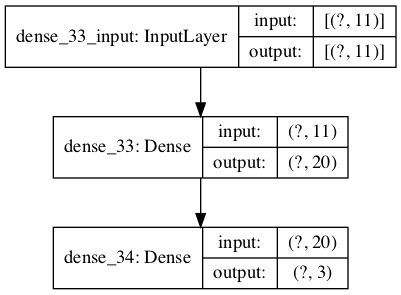

None

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [72]:
display(plot_model(m,show_shapes=True),model.summary())

display(history[0].history.keys())

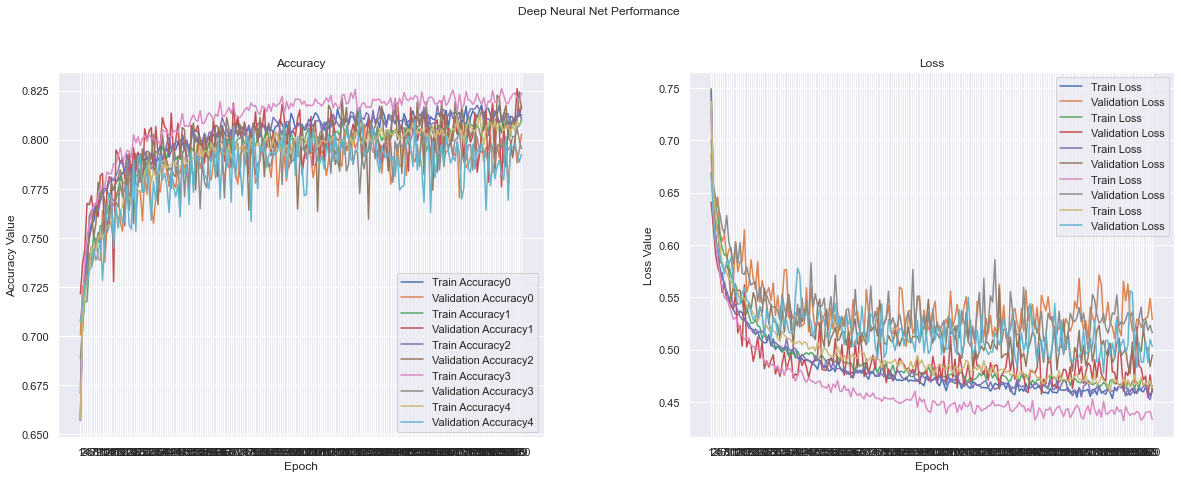

In [73]:
#the code here display all the individual K-fold loss and accuracy


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)
epochs=200
for i in range(len(history)):

    epochs = list(range(1,epoch_set+1))
    
    label="Accuracy KFold"+ str(i)

    ax1.plot(epochs, history[i].history['sparse_categorical_accuracy'], label='Train Accuracy'+str(i) )
    ax1.plot(epochs, history[i].history['val_sparse_categorical_accuracy'], label='Validation Accuracy'+str(i))
    ax1.set_xticks(epochs)
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    label="Train Loss KFold"+ str(i)
    ax2.plot(epochs, history[i].history['loss'], label='Train Loss')
    ax2.plot(epochs, history[i].history['val_loss'], label='Validation Loss')
    ax2.set_xticks(epochs)
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 6.91 µs


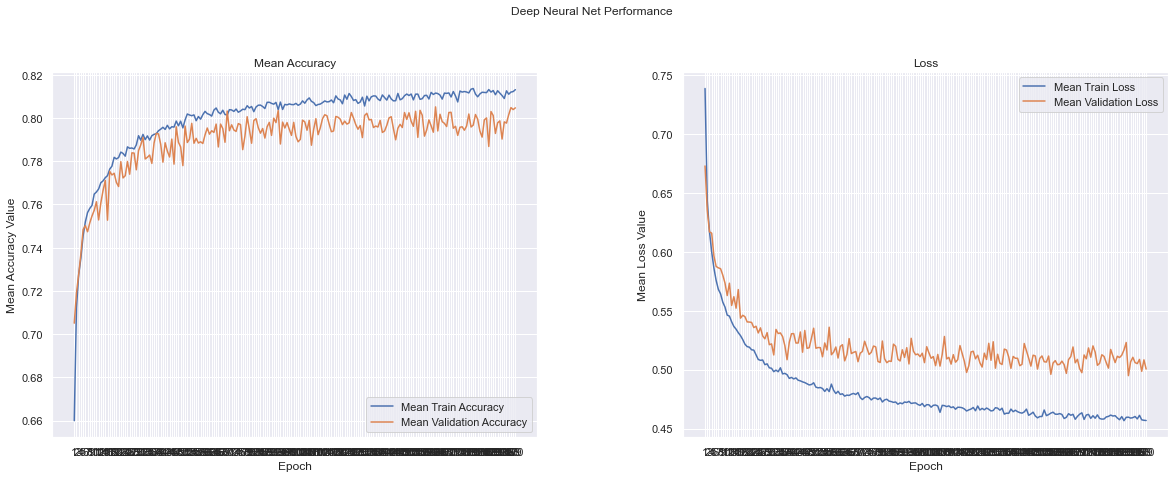

In [74]:
#Get a Cleaner Chart by taking the average element wise of each k-fold output. 
#this chart shows more clearly the trend in validation and training accuracy & loss over epoch.

%time

sca=[]
vsca=[]
l=[]
vl=[]
for i in range(len(history)):
    
    sca.append(np.array(history[i].history['sparse_categorical_accuracy']))
    vsca.append(np.array(history[i].history['val_sparse_categorical_accuracy']))
    l.append(np.array(history[i].history['loss']))
    vl.append(np.array(history[i].history['val_loss']))
    
sca=np.average(sca,axis=0)
vsca=np.average(vsca,axis=0)
l=np.average(l,axis=0)
vl=np.average(vl,axis=0)


epochs = list(range(1,epoch_set+1))
label="Accuracy KFold"
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(epochs, sca, label='Mean Train Accuracy' )
ax1.plot(epochs, vsca, label='Mean Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Mean Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Mean Accuracy')
l1 = ax1.legend(loc="best")

label="Train Loss KFold"
ax2.plot(epochs, l, label='Mean Train Loss')
ax2.plot(epochs, vl, label='Mean Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Mean Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [75]:
y_predict=model.predict_classes(X_test) #np.argmax(model.predict(x), axis=-1)
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,classification_report
display('confusion matrix:',confusion_matrix(y_test, y_predict))
# display('precision :',precision_score(y_test_enc, y_predict))
# display('recall :',recall_score(y_test_enc, y_predict))
# display('f1 score :', f1_score(y_test_enc,y_predict))
print(classification_report(y_test,y_predict))

31/31 [==============================] - 0s 526us/step - loss: 0.9238 - sparse_categorical_accuracy: 0.6173
[0.9237634539604187, 0.6173469424247742]


'confusion matrix:'

array([[ 16,  12,   2],
       [109, 427, 187],
       [  9,  56, 162]])

              precision    recall  f1-score   support

           0       0.12      0.53      0.20        30
           1       0.86      0.59      0.70       723
           2       0.46      0.71      0.56       227

    accuracy                           0.62       980
   macro avg       0.48      0.61      0.49       980
weighted avg       0.75      0.62      0.65       980



### Experiment 2: Deep Neural Network

* with kernel initializer, dropout layers larger number of neurons and kernel regularizers.
* have more hidden layers.

In [76]:
%%time

from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import metrics

epoch_set=200
seed = 42
np.random.seed(seed)
history=[]
m=None
cvscores=[]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X_smote_train, y_smote_train):
    print(train.shape, test.shape)
    #print(X_smote_train.iloc[train,:])
    model = Sequential()
    model.add(Dense(20, input_dim=11, activation='relu',kernel_initializer='he_normal'))
                    #kernel_regularizer=tf.keras.regularizers.L2(0.1)))
    model.add(Dropout(0.5))
    model.add(Dense(20,activation='relu',kernel_initializer='he_normal'))
                    #kernel_regularizer=tf.keras.regularizers.L2(0.1)))
    model.add(Dropout(0.5))

    
    
    model.add(Dense(3,activation='softmax')) #there are 3 labels of wine quality class.
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum-0.0)
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    m=model
    
    h=(model.fit(X_smote_train[train,:], y_smote_train[train], batch_size=32,epochs=epoch_set,verbose=1,
                validation_data=(X_smote_train[test], y_smote_train[test])
                
                
                )) 
    
    #shuffle=True, validation_data=(X_test,y_test_enc)
    history.append(h)
    
    #scores = model.evaluate(X_smote_train[test], y_train_enc[test], verbose=1)
    #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    #cvscores.append(scores[1] * 100)
#print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
    

(7036,) (1760,)
Epoch 1/200
220/220 [==============================] - 0s 1ms/step - loss: 1.0269 - sparse_categorical_accuracy: 0.5139 - val_loss: 0.7848 - val_sparse_categorical_accuracy: 0.6523
Epoch 2/200
220/220 [==============================] - 0s 734us/step - loss: 0.8430 - sparse_categorical_accuracy: 0.5969 - val_loss: 0.7422 - val_sparse_categorical_accuracy: 0.6500
Epoch 3/200
220/220 [==============================] - 0s 751us/step - loss: 0.8142 - sparse_categorical_accuracy: 0.6140 - val_loss: 0.7338 - val_sparse_categorical_accuracy: 0.6676
Epoch 4/200
220/220 [==============================] - 0s 760us/step - loss: 0.7873 - sparse_categorical_accuracy: 0.6229 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.6812
Epoch 5/200
220/220 [==============================] - 0s 754us/step - loss: 0.7716 - sparse_categorical_accuracy: 0.6360 - val_loss: 0.6968 - val_sparse_categorical_accuracy: 0.6824
Epoch 6/200
220/220 [==============================] - 0s 747us/step - 

220/220 [==============================] - 0s 717us/step - loss: 0.7256 - sparse_categorical_accuracy: 0.6535 - val_loss: 0.6543 - val_sparse_categorical_accuracy: 0.6972
Epoch 46/200
220/220 [==============================] - 0s 750us/step - loss: 0.7303 - sparse_categorical_accuracy: 0.6694 - val_loss: 0.6480 - val_sparse_categorical_accuracy: 0.6955
Epoch 47/200
220/220 [==============================] - 0s 747us/step - loss: 0.7410 - sparse_categorical_accuracy: 0.6471 - val_loss: 0.6524 - val_sparse_categorical_accuracy: 0.7045
Epoch 48/200
220/220 [==============================] - 0s 732us/step - loss: 0.7324 - sparse_categorical_accuracy: 0.6649 - val_loss: 0.6576 - val_sparse_categorical_accuracy: 0.7051
Epoch 49/200
220/220 [==============================] - 0s 748us/step - loss: 0.7395 - sparse_categorical_accuracy: 0.6543 - val_loss: 0.6517 - val_sparse_categorical_accuracy: 0.6994
Epoch 50/200
220/220 [==============================] - 0s 740us/step - loss: 0.7277 - sparse

220/220 [==============================] - 0s 805us/step - loss: 0.7329 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.6515 - val_sparse_categorical_accuracy: 0.7045
Epoch 90/200
220/220 [==============================] - 0s 814us/step - loss: 0.7378 - sparse_categorical_accuracy: 0.6451 - val_loss: 0.6622 - val_sparse_categorical_accuracy: 0.7057
Epoch 91/200
220/220 [==============================] - 0s 822us/step - loss: 0.7229 - sparse_categorical_accuracy: 0.6599 - val_loss: 0.6570 - val_sparse_categorical_accuracy: 0.7051
Epoch 92/200
220/220 [==============================] - 0s 813us/step - loss: 0.7340 - sparse_categorical_accuracy: 0.6519 - val_loss: 0.6387 - val_sparse_categorical_accuracy: 0.7051
Epoch 93/200
220/220 [==============================] - 0s 807us/step - loss: 0.7252 - sparse_categorical_accuracy: 0.6607 - val_loss: 0.6659 - val_sparse_categorical_accuracy: 0.6835
Epoch 94/200
220/220 [==============================] - 0s 798us/step - loss: 0.7382 - sparse

220/220 [==============================] - 0s 938us/step - loss: 0.7256 - sparse_categorical_accuracy: 0.6576 - val_loss: 0.6594 - val_sparse_categorical_accuracy: 0.6892
Epoch 134/200
220/220 [==============================] - 0s 923us/step - loss: 0.7289 - sparse_categorical_accuracy: 0.6568 - val_loss: 0.6366 - val_sparse_categorical_accuracy: 0.6960
Epoch 135/200
220/220 [==============================] - 0s 898us/step - loss: 0.7359 - sparse_categorical_accuracy: 0.6592 - val_loss: 0.6416 - val_sparse_categorical_accuracy: 0.7125
Epoch 136/200
220/220 [==============================] - 0s 931us/step - loss: 0.7312 - sparse_categorical_accuracy: 0.6617 - val_loss: 0.6506 - val_sparse_categorical_accuracy: 0.6835
Epoch 137/200
220/220 [==============================] - 0s 866us/step - loss: 0.7283 - sparse_categorical_accuracy: 0.6646 - val_loss: 0.6549 - val_sparse_categorical_accuracy: 0.6920
Epoch 138/200
220/220 [==============================] - 0s 867us/step - loss: 0.7287 - s

220/220 [==============================] - 0s 943us/step - loss: 0.7313 - sparse_categorical_accuracy: 0.6573 - val_loss: 0.6649 - val_sparse_categorical_accuracy: 0.6767
Epoch 178/200
220/220 [==============================] - 0s 935us/step - loss: 0.7273 - sparse_categorical_accuracy: 0.6570 - val_loss: 0.6395 - val_sparse_categorical_accuracy: 0.7051
Epoch 179/200
220/220 [==============================] - 0s 942us/step - loss: 0.7221 - sparse_categorical_accuracy: 0.6616 - val_loss: 0.6387 - val_sparse_categorical_accuracy: 0.7051
Epoch 180/200
220/220 [==============================] - 0s 947us/step - loss: 0.7264 - sparse_categorical_accuracy: 0.6605 - val_loss: 0.6403 - val_sparse_categorical_accuracy: 0.7125
Epoch 181/200
220/220 [==============================] - 0s 896us/step - loss: 0.7347 - sparse_categorical_accuracy: 0.6625 - val_loss: 0.6499 - val_sparse_categorical_accuracy: 0.6932
Epoch 182/200
220/220 [==============================] - 0s 896us/step - loss: 0.7380 - s

220/220 [==============================] - 0s 959us/step - loss: 0.7626 - sparse_categorical_accuracy: 0.6422 - val_loss: 0.6375 - val_sparse_categorical_accuracy: 0.7072
Epoch 22/200
220/220 [==============================] - 0s 954us/step - loss: 0.7640 - sparse_categorical_accuracy: 0.6476 - val_loss: 0.6392 - val_sparse_categorical_accuracy: 0.6970
Epoch 23/200
220/220 [==============================] - 0s 959us/step - loss: 0.7524 - sparse_categorical_accuracy: 0.6423 - val_loss: 0.6603 - val_sparse_categorical_accuracy: 0.7163
Epoch 24/200
220/220 [==============================] - 0s 950us/step - loss: 0.7491 - sparse_categorical_accuracy: 0.6567 - val_loss: 0.6256 - val_sparse_categorical_accuracy: 0.7049
Epoch 25/200
220/220 [==============================] - 0s 951us/step - loss: 0.7464 - sparse_categorical_accuracy: 0.6597 - val_loss: 0.6344 - val_sparse_categorical_accuracy: 0.7106
Epoch 26/200
220/220 [==============================] - 0s 957us/step - loss: 0.7464 - sparse

220/220 [==============================] - 0s 946us/step - loss: 0.7386 - sparse_categorical_accuracy: 0.6570 - val_loss: 0.6298 - val_sparse_categorical_accuracy: 0.7084
Epoch 66/200
220/220 [==============================] - 0s 975us/step - loss: 0.7489 - sparse_categorical_accuracy: 0.6581 - val_loss: 0.6345 - val_sparse_categorical_accuracy: 0.6998
Epoch 67/200
220/220 [==============================] - 0s 958us/step - loss: 0.7510 - sparse_categorical_accuracy: 0.6524 - val_loss: 0.6242 - val_sparse_categorical_accuracy: 0.7112
Epoch 68/200
220/220 [==============================] - 0s 990us/step - loss: 0.7448 - sparse_categorical_accuracy: 0.6554 - val_loss: 0.6481 - val_sparse_categorical_accuracy: 0.6981
Epoch 69/200
220/220 [==============================] - 0s 981us/step - loss: 0.7491 - sparse_categorical_accuracy: 0.6582 - val_loss: 0.6405 - val_sparse_categorical_accuracy: 0.7152
Epoch 70/200
220/220 [==============================] - 0s 959us/step - loss: 0.7499 - sparse

220/220 [==============================] - 0s 906us/step - loss: 0.7469 - sparse_categorical_accuracy: 0.6527 - val_loss: 0.6210 - val_sparse_categorical_accuracy: 0.7078
Epoch 110/200
220/220 [==============================] - 0s 890us/step - loss: 0.7418 - sparse_categorical_accuracy: 0.6571 - val_loss: 0.6491 - val_sparse_categorical_accuracy: 0.6850
Epoch 111/200
220/220 [==============================] - 0s 895us/step - loss: 0.7380 - sparse_categorical_accuracy: 0.6622 - val_loss: 0.6701 - val_sparse_categorical_accuracy: 0.6913
Epoch 112/200
220/220 [==============================] - 0s 897us/step - loss: 0.7412 - sparse_categorical_accuracy: 0.6564 - val_loss: 0.6290 - val_sparse_categorical_accuracy: 0.6902
Epoch 113/200
220/220 [==============================] - 0s 890us/step - loss: 0.7437 - sparse_categorical_accuracy: 0.6496 - val_loss: 0.5973 - val_sparse_categorical_accuracy: 0.7220
Epoch 114/200
220/220 [==============================] - 0s 924us/step - loss: 0.7398 - s

220/220 [==============================] - 0s 995us/step - loss: 0.7529 - sparse_categorical_accuracy: 0.6595 - val_loss: 0.6237 - val_sparse_categorical_accuracy: 0.7140
Epoch 154/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7458 - sparse_categorical_accuracy: 0.6599 - val_loss: 0.6111 - val_sparse_categorical_accuracy: 0.7129
Epoch 155/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7486 - sparse_categorical_accuracy: 0.6611 - val_loss: 0.6230 - val_sparse_categorical_accuracy: 0.7163
Epoch 156/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7538 - sparse_categorical_accuracy: 0.6605 - val_loss: 0.6175 - val_sparse_categorical_accuracy: 0.7180
Epoch 157/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7415 - sparse_categorical_accuracy: 0.6648 - val_loss: 0.6231 - val_sparse_categorical_accuracy: 0.7038
Epoch 158/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7451 - sparse_cate

Epoch 198/200
220/220 [==============================] - 0s 982us/step - loss: 0.7341 - sparse_categorical_accuracy: 0.6639 - val_loss: 0.6102 - val_sparse_categorical_accuracy: 0.7078
Epoch 199/200
220/220 [==============================] - 0s 964us/step - loss: 0.7247 - sparse_categorical_accuracy: 0.6649 - val_loss: 0.6143 - val_sparse_categorical_accuracy: 0.7118
Epoch 200/200
220/220 [==============================] - 0s 933us/step - loss: 0.7362 - sparse_categorical_accuracy: 0.6727 - val_loss: 0.6353 - val_sparse_categorical_accuracy: 0.7067
(7037,) (1759,)
Epoch 1/200
220/220 [==============================] - 0s 1ms/step - loss: 1.0383 - sparse_categorical_accuracy: 0.4965 - val_loss: 0.8017 - val_sparse_categorical_accuracy: 0.6271
Epoch 2/200
220/220 [==============================] - 0s 846us/step - loss: 0.8582 - sparse_categorical_accuracy: 0.5856 - val_loss: 0.7297 - val_sparse_categorical_accuracy: 0.6572
Epoch 3/200
220/220 [==============================] - 0s 857us/s

220/220 [==============================] - 0s 893us/step - loss: 0.7371 - sparse_categorical_accuracy: 0.6581 - val_loss: 0.6462 - val_sparse_categorical_accuracy: 0.6947
Epoch 43/200
220/220 [==============================] - 0s 910us/step - loss: 0.7347 - sparse_categorical_accuracy: 0.6577 - val_loss: 0.6528 - val_sparse_categorical_accuracy: 0.7038
Epoch 44/200
220/220 [==============================] - 0s 938us/step - loss: 0.7468 - sparse_categorical_accuracy: 0.6450 - val_loss: 0.6280 - val_sparse_categorical_accuracy: 0.7044
Epoch 45/200
220/220 [==============================] - 0s 904us/step - loss: 0.7336 - sparse_categorical_accuracy: 0.6611 - val_loss: 0.6373 - val_sparse_categorical_accuracy: 0.7135
Epoch 46/200
220/220 [==============================] - 0s 922us/step - loss: 0.7397 - sparse_categorical_accuracy: 0.6511 - val_loss: 0.6386 - val_sparse_categorical_accuracy: 0.7078
Epoch 47/200
220/220 [==============================] - 0s 870us/step - loss: 0.7482 - sparse

Epoch 87/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7392 - sparse_categorical_accuracy: 0.6626 - val_loss: 0.6260 - val_sparse_categorical_accuracy: 0.7106
Epoch 88/200
220/220 [==============================] - 0s 955us/step - loss: 0.7327 - sparse_categorical_accuracy: 0.6631 - val_loss: 0.6142 - val_sparse_categorical_accuracy: 0.7328
Epoch 89/200
220/220 [==============================] - 0s 951us/step - loss: 0.7239 - sparse_categorical_accuracy: 0.6686 - val_loss: 0.6158 - val_sparse_categorical_accuracy: 0.7214
Epoch 90/200
220/220 [==============================] - 0s 954us/step - loss: 0.7233 - sparse_categorical_accuracy: 0.6601 - val_loss: 0.6160 - val_sparse_categorical_accuracy: 0.7277
Epoch 91/200
220/220 [==============================] - 0s 952us/step - loss: 0.7222 - sparse_categorical_accuracy: 0.6624 - val_loss: 0.6314 - val_sparse_categorical_accuracy: 0.7106
Epoch 92/200
220/220 [==============================] - 0s 963us/step - loss: 0.72

220/220 [==============================] - 0s 977us/step - loss: 0.7274 - sparse_categorical_accuracy: 0.6537 - val_loss: 0.6383 - val_sparse_categorical_accuracy: 0.7055
Epoch 132/200
220/220 [==============================] - 0s 967us/step - loss: 0.7372 - sparse_categorical_accuracy: 0.6543 - val_loss: 0.6259 - val_sparse_categorical_accuracy: 0.7146
Epoch 133/200
220/220 [==============================] - 0s 964us/step - loss: 0.7346 - sparse_categorical_accuracy: 0.6673 - val_loss: 0.6241 - val_sparse_categorical_accuracy: 0.7237
Epoch 134/200
220/220 [==============================] - 0s 964us/step - loss: 0.7269 - sparse_categorical_accuracy: 0.6592 - val_loss: 0.6144 - val_sparse_categorical_accuracy: 0.7277
Epoch 135/200
220/220 [==============================] - 0s 980us/step - loss: 0.7385 - sparse_categorical_accuracy: 0.6510 - val_loss: 0.6336 - val_sparse_categorical_accuracy: 0.7049
Epoch 136/200
220/220 [==============================] - 0s 964us/step - loss: 0.7325 - s

220/220 [==============================] - 0s 973us/step - loss: 0.7322 - sparse_categorical_accuracy: 0.6571 - val_loss: 0.6116 - val_sparse_categorical_accuracy: 0.7237
Epoch 176/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7353 - sparse_categorical_accuracy: 0.6553 - val_loss: 0.6482 - val_sparse_categorical_accuracy: 0.6981
Epoch 177/200
220/220 [==============================] - 0s 947us/step - loss: 0.7380 - sparse_categorical_accuracy: 0.6553 - val_loss: 0.6340 - val_sparse_categorical_accuracy: 0.7317
Epoch 178/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7287 - sparse_categorical_accuracy: 0.6533 - val_loss: 0.6293 - val_sparse_categorical_accuracy: 0.6993
Epoch 179/200
220/220 [==============================] - 0s 987us/step - loss: 0.7293 - sparse_categorical_accuracy: 0.6591 - val_loss: 0.6312 - val_sparse_categorical_accuracy: 0.7049
Epoch 180/200
220/220 [==============================] - 0s 932us/step - loss: 0.7258 - spars

220/220 [==============================] - 0s 1ms/step - loss: 0.7585 - sparse_categorical_accuracy: 0.6439 - val_loss: 0.6727 - val_sparse_categorical_accuracy: 0.6879
Epoch 20/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7421 - sparse_categorical_accuracy: 0.6454 - val_loss: 0.6711 - val_sparse_categorical_accuracy: 0.6902
Epoch 21/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7441 - sparse_categorical_accuracy: 0.6500 - val_loss: 0.6679 - val_sparse_categorical_accuracy: 0.6885
Epoch 22/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7495 - sparse_categorical_accuracy: 0.6526 - val_loss: 0.6770 - val_sparse_categorical_accuracy: 0.6953
Epoch 23/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7460 - sparse_categorical_accuracy: 0.6507 - val_loss: 0.6681 - val_sparse_categorical_accuracy: 0.6811
Epoch 24/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7416 - sparse_categorical

Epoch 64/200
220/220 [==============================] - 0s 965us/step - loss: 0.7297 - sparse_categorical_accuracy: 0.6567 - val_loss: 0.6474 - val_sparse_categorical_accuracy: 0.6947
Epoch 65/200
220/220 [==============================] - 0s 966us/step - loss: 0.7378 - sparse_categorical_accuracy: 0.6595 - val_loss: 0.6428 - val_sparse_categorical_accuracy: 0.7044
Epoch 66/200
220/220 [==============================] - 0s 986us/step - loss: 0.7294 - sparse_categorical_accuracy: 0.6591 - val_loss: 0.6462 - val_sparse_categorical_accuracy: 0.6976
Epoch 67/200
220/220 [==============================] - 0s 1ms/step - loss: 0.7429 - sparse_categorical_accuracy: 0.6554 - val_loss: 0.6376 - val_sparse_categorical_accuracy: 0.6924
Epoch 68/200
220/220 [==============================] - 0s 959us/step - loss: 0.7295 - sparse_categorical_accuracy: 0.6557 - val_loss: 0.6472 - val_sparse_categorical_accuracy: 0.7049
Epoch 69/200
220/220 [==============================] - 0s 995us/step - loss: 0.71

Epoch 109/200
220/220 [==============================] - 0s 963us/step - loss: 0.7341 - sparse_categorical_accuracy: 0.6527 - val_loss: 0.6394 - val_sparse_categorical_accuracy: 0.7032
Epoch 110/200
220/220 [==============================] - 0s 960us/step - loss: 0.7289 - sparse_categorical_accuracy: 0.6554 - val_loss: 0.6367 - val_sparse_categorical_accuracy: 0.6941
Epoch 111/200
220/220 [==============================] - 0s 950us/step - loss: 0.7231 - sparse_categorical_accuracy: 0.6551 - val_loss: 0.6433 - val_sparse_categorical_accuracy: 0.7032
Epoch 112/200
220/220 [==============================] - 0s 959us/step - loss: 0.7291 - sparse_categorical_accuracy: 0.6557 - val_loss: 0.6499 - val_sparse_categorical_accuracy: 0.6839
Epoch 113/200
220/220 [==============================] - 0s 950us/step - loss: 0.7242 - sparse_categorical_accuracy: 0.6618 - val_loss: 0.6617 - val_sparse_categorical_accuracy: 0.6879
Epoch 114/200
220/220 [==============================] - 0s 946us/step - lo

220/220 [==============================] - 0s 898us/step - loss: 0.7256 - sparse_categorical_accuracy: 0.6631 - val_loss: 0.6352 - val_sparse_categorical_accuracy: 0.7078
Epoch 154/200
220/220 [==============================] - 0s 891us/step - loss: 0.7220 - sparse_categorical_accuracy: 0.6639 - val_loss: 0.6423 - val_sparse_categorical_accuracy: 0.7032
Epoch 155/200
220/220 [==============================] - 0s 924us/step - loss: 0.7232 - sparse_categorical_accuracy: 0.6588 - val_loss: 0.6346 - val_sparse_categorical_accuracy: 0.6998
Epoch 156/200
220/220 [==============================] - 0s 900us/step - loss: 0.7181 - sparse_categorical_accuracy: 0.6642 - val_loss: 0.6241 - val_sparse_categorical_accuracy: 0.6964
Epoch 157/200
220/220 [==============================] - 0s 886us/step - loss: 0.7185 - sparse_categorical_accuracy: 0.6624 - val_loss: 0.6282 - val_sparse_categorical_accuracy: 0.7129
Epoch 158/200
220/220 [==============================] - 0s 900us/step - loss: 0.7304 - s

220/220 [==============================] - 0s 847us/step - loss: 0.7237 - sparse_categorical_accuracy: 0.6680 - val_loss: 0.6227 - val_sparse_categorical_accuracy: 0.7146
Epoch 198/200
220/220 [==============================] - 0s 842us/step - loss: 0.7321 - sparse_categorical_accuracy: 0.6557 - val_loss: 0.6418 - val_sparse_categorical_accuracy: 0.6947
Epoch 199/200
220/220 [==============================] - 0s 837us/step - loss: 0.7288 - sparse_categorical_accuracy: 0.6609 - val_loss: 0.6398 - val_sparse_categorical_accuracy: 0.6976
Epoch 200/200
220/220 [==============================] - 0s 851us/step - loss: 0.7422 - sparse_categorical_accuracy: 0.6472 - val_loss: 0.6384 - val_sparse_categorical_accuracy: 0.7004
(7037,) (1759,)
Epoch 1/200
220/220 [==============================] - 0s 1ms/step - loss: 0.9875 - sparse_categorical_accuracy: 0.5244 - val_loss: 0.7638 - val_sparse_categorical_accuracy: 0.6464
Epoch 2/200
220/220 [==============================] - 0s 815us/step - loss: 

220/220 [==============================] - 0s 845us/step - loss: 0.7419 - sparse_categorical_accuracy: 0.6638 - val_loss: 0.6439 - val_sparse_categorical_accuracy: 0.7169
Epoch 42/200
220/220 [==============================] - 0s 824us/step - loss: 0.7505 - sparse_categorical_accuracy: 0.6622 - val_loss: 0.6328 - val_sparse_categorical_accuracy: 0.6993
Epoch 43/200
220/220 [==============================] - 0s 831us/step - loss: 0.7479 - sparse_categorical_accuracy: 0.6561 - val_loss: 0.6425 - val_sparse_categorical_accuracy: 0.6953
Epoch 44/200
220/220 [==============================] - 0s 827us/step - loss: 0.7469 - sparse_categorical_accuracy: 0.6592 - val_loss: 0.6622 - val_sparse_categorical_accuracy: 0.7004
Epoch 45/200
220/220 [==============================] - 0s 868us/step - loss: 0.7341 - sparse_categorical_accuracy: 0.6616 - val_loss: 0.6300 - val_sparse_categorical_accuracy: 0.6924
Epoch 46/200
220/220 [==============================] - 0s 860us/step - loss: 0.7506 - sparse

220/220 [==============================] - 0s 810us/step - loss: 0.7304 - sparse_categorical_accuracy: 0.6672 - val_loss: 0.6422 - val_sparse_categorical_accuracy: 0.6839
Epoch 86/200
220/220 [==============================] - 0s 802us/step - loss: 0.7523 - sparse_categorical_accuracy: 0.6575 - val_loss: 0.6333 - val_sparse_categorical_accuracy: 0.7015
Epoch 87/200
220/220 [==============================] - 0s 806us/step - loss: 0.7491 - sparse_categorical_accuracy: 0.6558 - val_loss: 0.6515 - val_sparse_categorical_accuracy: 0.6947
Epoch 88/200
220/220 [==============================] - 0s 811us/step - loss: 0.7501 - sparse_categorical_accuracy: 0.6594 - val_loss: 0.6366 - val_sparse_categorical_accuracy: 0.7106
Epoch 89/200
220/220 [==============================] - 0s 797us/step - loss: 0.7295 - sparse_categorical_accuracy: 0.6619 - val_loss: 0.6284 - val_sparse_categorical_accuracy: 0.7044
Epoch 90/200
220/220 [==============================] - 0s 811us/step - loss: 0.7341 - sparse

220/220 [==============================] - 0s 802us/step - loss: 0.7372 - sparse_categorical_accuracy: 0.6535 - val_loss: 0.6320 - val_sparse_categorical_accuracy: 0.7010
Epoch 130/200
220/220 [==============================] - 0s 793us/step - loss: 0.7432 - sparse_categorical_accuracy: 0.6538 - val_loss: 0.6478 - val_sparse_categorical_accuracy: 0.6970
Epoch 131/200
220/220 [==============================] - 0s 785us/step - loss: 0.7446 - sparse_categorical_accuracy: 0.6625 - val_loss: 0.6359 - val_sparse_categorical_accuracy: 0.6868
Epoch 132/200
220/220 [==============================] - 0s 791us/step - loss: 0.7513 - sparse_categorical_accuracy: 0.6570 - val_loss: 0.6267 - val_sparse_categorical_accuracy: 0.6930
Epoch 133/200
220/220 [==============================] - 0s 797us/step - loss: 0.7418 - sparse_categorical_accuracy: 0.6645 - val_loss: 0.6285 - val_sparse_categorical_accuracy: 0.6947
Epoch 134/200
220/220 [==============================] - 0s 793us/step - loss: 0.7550 - s

220/220 [==============================] - 0s 843us/step - loss: 0.7375 - sparse_categorical_accuracy: 0.6574 - val_loss: 0.6315 - val_sparse_categorical_accuracy: 0.7032
Epoch 174/200
220/220 [==============================] - 0s 824us/step - loss: 0.7307 - sparse_categorical_accuracy: 0.6577 - val_loss: 0.6330 - val_sparse_categorical_accuracy: 0.7061
Epoch 175/200
220/220 [==============================] - 0s 850us/step - loss: 0.7462 - sparse_categorical_accuracy: 0.6578 - val_loss: 0.6224 - val_sparse_categorical_accuracy: 0.7146
Epoch 176/200
220/220 [==============================] - 0s 832us/step - loss: 0.7348 - sparse_categorical_accuracy: 0.6616 - val_loss: 0.6139 - val_sparse_categorical_accuracy: 0.7118
Epoch 177/200
220/220 [==============================] - 0s 886us/step - loss: 0.7392 - sparse_categorical_accuracy: 0.6645 - val_loss: 0.6255 - val_sparse_categorical_accuracy: 0.7015
Epoch 178/200
220/220 [==============================] - 0s 866us/step - loss: 0.7515 - s

The wall time means that a clock hanging on a wall outside of the computer would measure 7.54 s from the time the code was submitted to the CPU to the time when the process completed.

User time and sys time both refer to time taken by the CPU to actually work on the code. 

The CPU time dedicated to our code is only a fraction of the wall time as the CPU swaps its attention from our code to other processes that are running on the system.

User time is the amount of CPU time taken outside of the kernel. 

Sys time is the amount of time taken inside of the kernel. 

The actual CPU time used by the process is user time + sys time. 

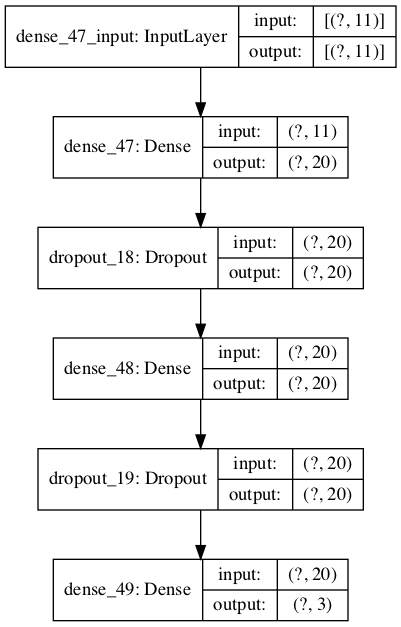

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [77]:
display(plot_model(m,show_shapes=True))

display(history[0].history.keys())

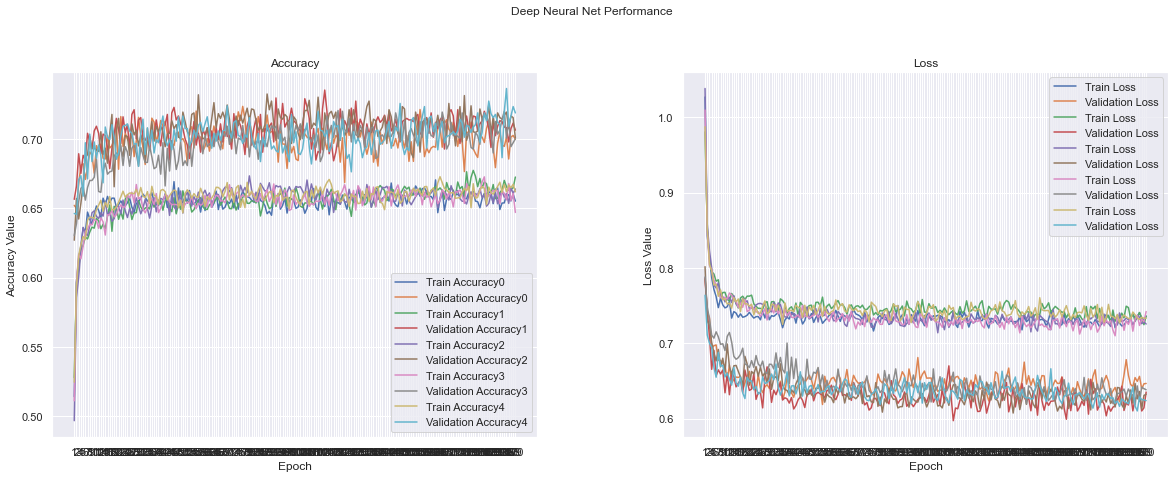

In [78]:
#the code here display all the individual K-fold loss and accuracy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

for i in range(len(history)):

    epochs = list(range(1,epoch_set+1))
    
    label="Accuracy KFold"+ str(i)

    ax1.plot(epochs, history[i].history['sparse_categorical_accuracy'], label='Train Accuracy'+str(i) )
    ax1.plot(epochs, history[i].history['val_sparse_categorical_accuracy'], label='Validation Accuracy'+str(i))
    ax1.set_xticks(epochs)
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    label="Train Loss KFold"+ str(i)
    ax2.plot(epochs, history[i].history['loss'], label='Train Loss')
    ax2.plot(epochs, history[i].history['val_loss'], label='Validation Loss')
    ax2.set_xticks(epochs)
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

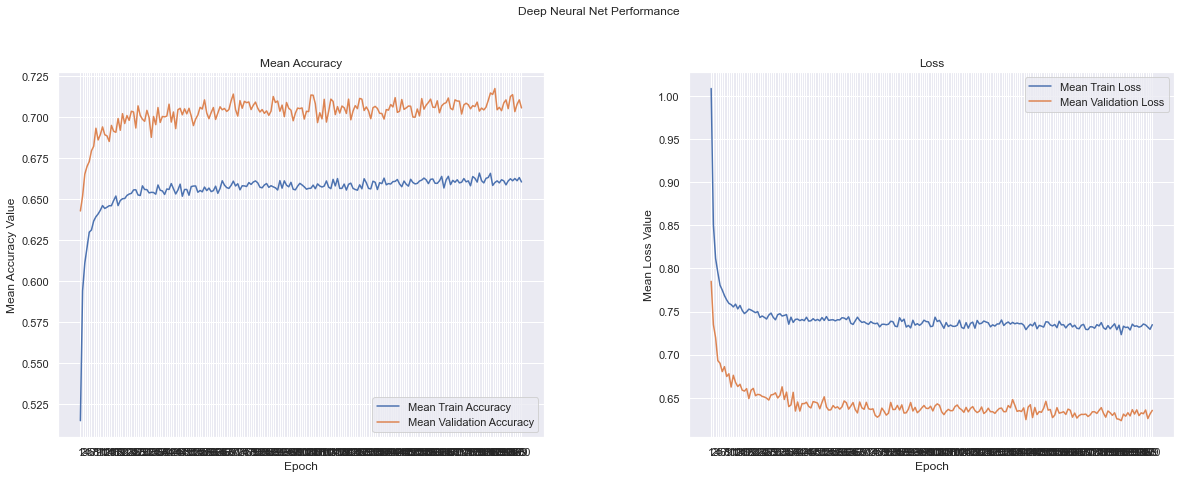

In [79]:
#Get a Cleaner Chart by taking the average element wise of each k-fold output. 
#this chart shows more clearly the trend in validation and training accuracy & loss over epoch.


sca=[]
vsca=[]
l=[]
vl=[]
for i in range(len(history)):
    
    sca.append(np.array(history[i].history['sparse_categorical_accuracy']))
    vsca.append(np.array(history[i].history['val_sparse_categorical_accuracy']))
    l.append(np.array(history[i].history['loss']))
    vl.append(np.array(history[i].history['val_loss']))
    
sca=np.average(sca,axis=0)
vsca=np.average(vsca,axis=0)
l=np.average(l,axis=0)
vl=np.average(vl,axis=0)


epochs = list(range(1,epoch_set+1))
label="Accuracy KFold"
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(epochs, sca, label='Mean Train Accuracy' )
ax1.plot(epochs, vsca, label='Mean Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Mean Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Mean Accuracy')
l1 = ax1.legend(loc="best")

label="Train Loss KFold"
ax2.plot(epochs, l, label='Mean Train Loss')
ax2.plot(epochs, vl, label='Mean Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Mean Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [80]:
y_predict=model.predict_classes(X_test)
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,classification_report
display('confusion matrix:',confusion_matrix(y_test, y_predict))
# display('precision :',precision_score(y_test_enc, y_predict))
# display('recall :',recall_score(y_test_enc, y_predict))
# display('f1 score :', f1_score(y_test_enc,y_predict))
print(classification_report(y_test,y_predict))


31/31 [==============================] - 0s 478us/step - loss: 0.8660 - sparse_categorical_accuracy: 0.5071
[0.8660091757774353, 0.5071428418159485]


'confusion matrix:'

array([[ 23,   3,   4],
       [166, 274, 283],
       [ 14,  13, 200]])

              precision    recall  f1-score   support

           0       0.11      0.77      0.20        30
           1       0.94      0.38      0.54       723
           2       0.41      0.88      0.56       227

    accuracy                           0.51       980
   macro avg       0.49      0.68      0.43       980
weighted avg       0.80      0.51      0.53       980

